In [1]:
# add library
import cv2
import glob
import numpy as np
import copy
from queue import PriorityQueue
from matplotlib import pyplot as plt

In [2]:
# implement distance function
def distance(a, b):
    # YOUR CODE HERE
    return np.linalg.norm(a - b)

In [3]:
def create_keypoints(w, h):
    keypoints = []
    keypointSize = 11
    # please sample the image uniformly in a grid
    # find the keypoint size and number of sample points
    # as hyperparameters

    # YOUR CODE HERE

    keypoints = [cv2.KeyPoint(i, j, keypointSize) for i in range(h) for j in range(w)]
    
    return keypoints

In [4]:
# 1. preprocessing and load
images = glob.glob('../resources/images/db/train/*/*.jpg')

# 2. create keypoints on a regular grid (cv2.KeyPoint(r, c, keypointSize), as keypoint size use e.g. 11)
descriptors = []
keypoints = create_keypoints(256, 256)

# 3. use the keypoints for each image and compute SIFT descriptors
#    for each keypoint. this compute one descriptor for each image.

for image in images:
    
    # read the images
    image = cv2.imread(image)
    
    if image.shape != (256, 256):
        #print(f'not shaped: {image.shape}')
        image = cv2.resize(image, (int(256), int(256)))   
    
    # convert to gray scale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # sift transformation
    sift = cv2.SIFT_create()
    kp, descriptor = sift.compute(gray, keypoints)
    
    # add the descriptor in the decriptors
    descriptors.append(descriptor)

In [5]:
# YOUR CODE HERE

# 4. use one of the query input image to query the 'image database' that
#    now compress to a single area. Therefore extract the descriptor and
#    compare the descriptor to each image in the database using the L2-norm
#    and save the result into a priority queue (q = PriorityQueue())

test_img = cv2.imread('../resources/images/db/test/car.jpg')
my_p_queue = PriorityQueue() 

if test_img.shape != (256,256):
    test_img = cv2.resize(test_img, (int(256), int(256)))
    
test_gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

test_kp , test_descriptor = sift.compute(test_gray, keypoints)

for index, train_descriptor in enumerate(descriptors):
    dist = distance(train_descriptor, test_descriptor)
    my_p_queue.put((dist, images[index]))

In [6]:
# YOUR CODE HERE

# 5. output (save and/or display) the query results in the order of smallest distance

# YOUR CODE HERE

top_5_url = []

count = 0
while not my_p_queue.empty() and count < 5:
    top_5_url.append(my_p_queue.get()[1])
    count += 1

In [7]:
top_5_url

['../resources/images/db/train\\cars\\1137646735_2fb2752249.jpg',
 '../resources/images/db/train\\cars\\car003.jpg',
 '../resources/images/db/train\\cars\\car001.jpg',
 '../resources/images/db/train\\cars\\2539497709_756f025f62.jpg',
 '../resources/images/db/train\\cars\\car002.jpg']

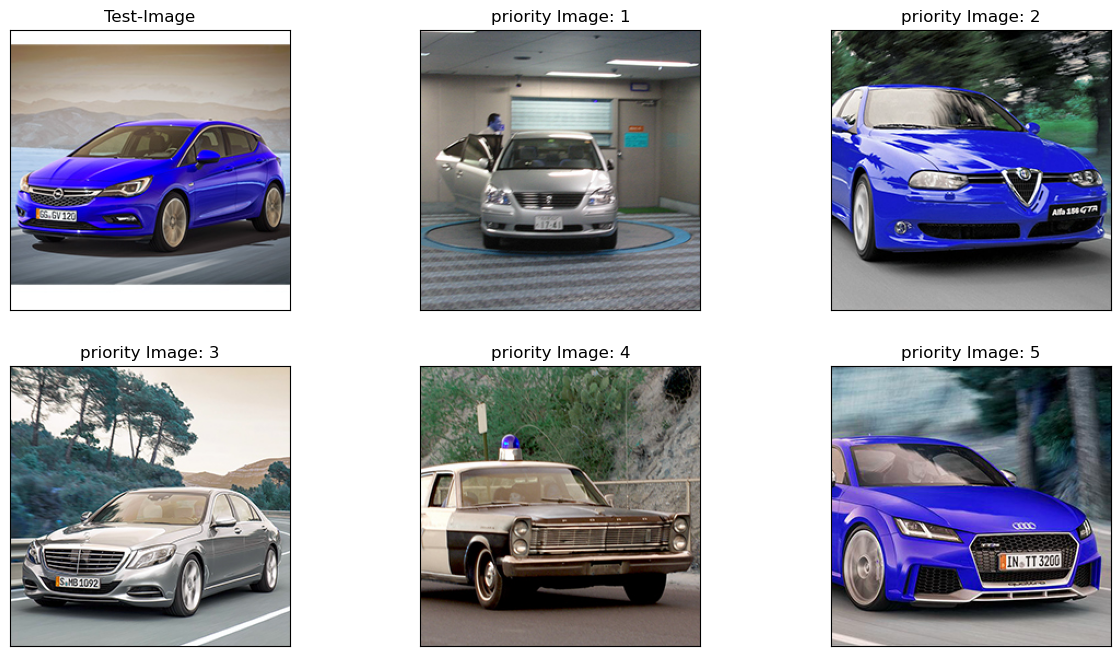

In [8]:
results = []

for i in range(len(top_5_url)):
    
    # priority image url
    
    img_url = top_5_url[i]
    
    queue_img = cv2.imread(img_url)
    
    if queue_img.shape != (256,256):
        queue_img = cv2.resize(queue_img, (int(256), int(256)))
    
    results = results + [queue_img]
    

horizontal_img = np.concatenate(results, axis=1)

plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1),plt.imshow(test_img)
plt.title('Test-Image'), plt.xticks([]), plt.yticks([])

for i in top_5_url:
    plt.subplot(2, 3, top_5_url.index(i)+2)
    
    queue_img = cv2.imread(i)
    
    if queue_img.shape != (256,256):
        queue_img = cv2.resize(queue_img, (int(256), int(256)))
        
    plt.imshow(queue_img)
    plt.title(f'priority Image: {top_5_url.index(i)+1}')
    plt.xticks([]), plt.yticks([])
    
plt.savefig('../output/Exercise-01.png'), plt.xticks([]), plt.yticks([])

plt.show()